In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

# Download NLTK data (one-time download)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load the dataset
url = "/content/drive/MyDrive/email.csv"
data = pd.read_csv(url, encoding='latin-1')

# Show the first few rows
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check for missing values
data.isnull().sum()

# Rename columns for clarity
data.columns = ['label', 'message']

# Map labels to numerical values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Display the dataset after renaming
data.head()


,label,message
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


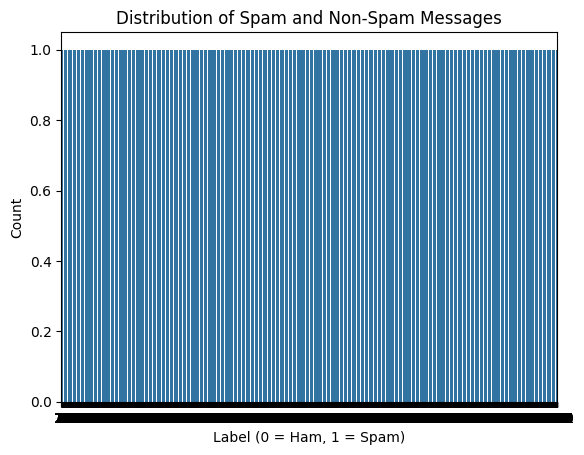

In [ ]:
# Visualize the distribution of labels
sns.countplot(data['label'])
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Download NLTK data (one-time download)
nltk.download('punkt')
nltk.download('stopwords')
# Download 'punkt_tab' which is required by sent_tokenize (implicitly called in word_tokenize)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Download NLTK data (one-time download)
nltk.download('punkt')
nltk.download('stopwords')
# Download 'punkt_tab' which is required by sent_tokenize (implicitly called in word_tokenize)
nltk.download('punkt_tab')

# ... (your previous code to load and process the dataset) ...

def clean_text(text):
    """
    Clean the input text by removing punctuation, stop words, and converting to lowercase.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Get English stop words
    cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stop words and non-alphanumeric tokens
    cleaned_text = ' '.join(cleaned_tokens)  # Join tokens back into a string
    return cleaned_text

# Apply the cleaning function to the 'message' column and create a new 'clean_message' column
data['clean_message'] = data['message'].apply(clean_text)

# Split the data into features (X) and labels (y)
X = data['clean_message']
y = data['label']

# ... (rest of your code) ...

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
!pip install pandas scikit-learn nltk

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# ... (your previous code to load and process the dataset) ...

# Download NLTK data (one-time download)
nltk.download('punkt')
nltk.download('stopwords')
# Download 'punkt_tab' which is required by sent_tokenize (implicitly called in word_tokenize)
nltk.download('punkt_tab')

def clean_text(text):
    """
    Clean the input text by removing punctuation, stop words, and converting to lowercase.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Get English stop words
    cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stop words and non-alphanumeric tokens
    cleaned_text = ' '.join(cleaned_tokens)  # Join tokens back into a string
    return cleaned_text

# Apply the cleaning function to the 'message' column and create a new 'clean_message' column
data['clean_message'] = data['message'].apply(clean_text)


data = data.dropna(subset=['label'])


# Split the data into features (X) and labels (y)
X = data['clean_message']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data, 20% for testing

# Build a pipeline to vectorize and classify the data
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('classifier', MultinomialNB())
])

# Train the model using the training data
pipeline.fit(X_train, y_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('classifier', MultinomialNB())])

In [ ]:
# Predict using the test data
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98
Confusion Matrix:
[[966   0]
 [ 25 124]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       966
         1.0       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



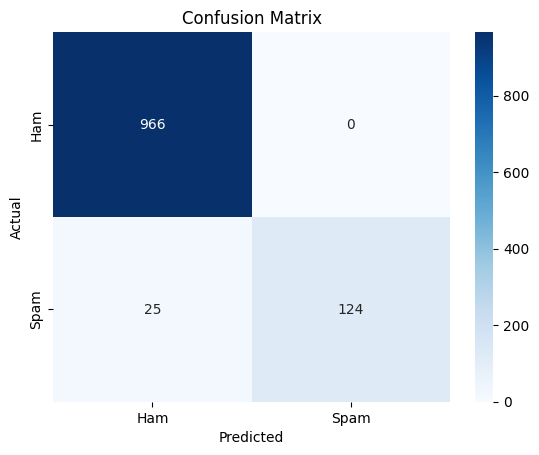

In [ ]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
